In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import time

Done loop in 0.10196781158447266


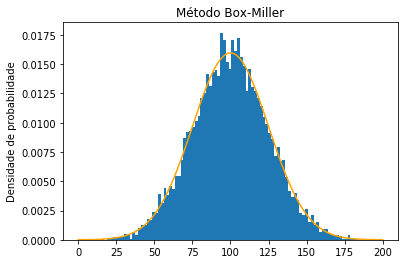

In [2]:
#Box-Muller transform in polar form 
#Random normally distributed number sampling 
t0 = time.time()
i = 0
rand = []
mean = 100
desv = 25
while (i < 10000):
    u1 = np.random.random()
    u2 = np.random.random()
    v1 = 2*u1-1
    v2 = 2*u2-1
    r2 = (v1**2)+(v2**2)
    
    if (r2 < 1):
        norm = v1*np.sqrt((-2*np.log(r2))/r2)
        rand.append(mean + norm*desv)
        i = i+1
        
print('Done loop in',time.time()-t0)

a = np.arange(0.0,200.0,0.01)
y = (1/(desv*np.sqrt(2*np.pi)))*np.exp(-((a-mean)**2)/(2*(desv**2)))
linha = plt.plot(a,y, color = 'orange')
histograma = plt.hist(rand, 100, density = 'True')

plt.xlabel('')
plt.ylabel('Densidade de probabilidade')
plt.title('Método Box-Miller')

plt.show()

Done loop in 2.011373996734619


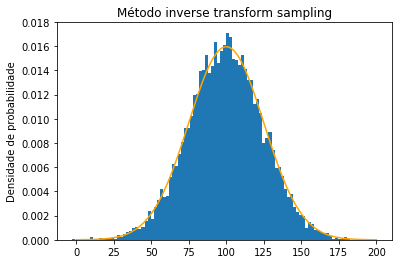

In [3]:
#Inverse transform sampling for normal distribuition
t0 = time.time()
rand1 = []
for i in range(10000):
    #stats.norm.ppf calculates the value of the inverse c.d.f function
    rand1.append(stats.norm.ppf(np.random.random(),loc = 100, scale = 25))
    
print('Done loop in',time.time()-t0)

a = np.arange(0.0,200.0,0.01)
y = (1/(desv*np.sqrt(2*np.pi)))*np.exp(-((a-mean)**2)/(2*(desv**2)))

line = plt.plot(a, y, color = 'orange')
histograma1 = plt.hist(rand1, 100, density = 'True' )

plt.xlabel('')
plt.ylabel('Densidade de probabilidade')
plt.title('Método inverse transform sampling')
plt.show()


Done loop in 1.5439467430114746
count =  20981


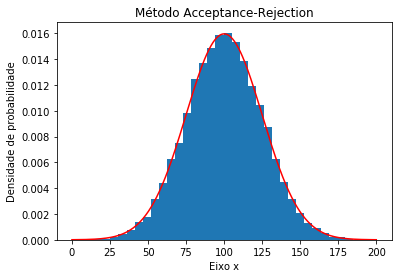

In [11]:
#Acceptance-Rejection method (normal distribuition)
t0 = time.time()
mean = 100
sd = 25
f = lambda x: (1/np.sqrt(2*np.pi*(sd**2)))*np.exp(-((x-mean)**2)/(2*(sd**2)))
#f(mean) is the max value of f(x).
#g(x) = f(mean) implies that g(x) >= f(x), for all real values of x.
c = 1/(300*f(mean))
g = lambda x: c*f(mean)
rand2 = []
count = 0
for i in range(100000):
    u = np.random.random()
    a = np.random.uniform(0,300)
    if ((1/c)*u*g(a) <= f(a)):
        rand2.append(a)
        count = count + 1
    
print('Done loop in',time.time()-t0)
print('count = ', count)

a = np.arange(0.0,200.0,0.01)
y = (1/(desv*np.sqrt(2*np.pi)))*np.exp(-((a-mean)**2)/(2*(desv**2)))
line = plt.plot(a,y, color = 'red')
histograma3 = plt.hist(rand2,35, density = 'True')

plt.xlabel('Eixo x')
plt.ylabel('Densidade de probabilidade')
plt.title('Método Acceptance-Rejection')
#plt.tight_layout()
plt.savefig('pdfUP.png')
plt.show()

Done loop in 0.06593728065490723


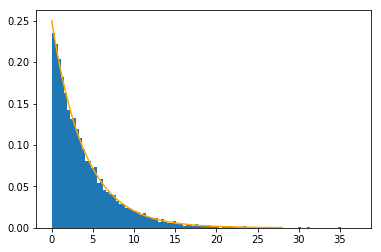

In [8]:
#Inverse transform sampling for exponential distribuition
t0 = time.time()
uniform = np.random.random()
param = 0.25
rand3 = []
for i in range(10000):
    uniform = np.random.random()
    rand3.append((-1/param)*np.log(1-uniform))

print('Done loop in',time.time()-t0)
a = np.arange(0.0,28.0,0.01)
y = param*np.exp(-param*a)
line = plt.plot(a,y, color = 'orange')
histograma2 = plt.hist(rand3, 100, density = 'True')
plt.show()


Done loop in 0.08685541152954102


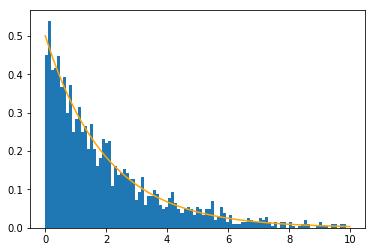

In [6]:
#Acceptance-Rejection method (exponencial distribuition)
t0 = time.time()
c = 0.5
exp = lambda x: c*np.exp(-c*x)
rand4 = [] 
for i in range(10000):
    u = np.random.random()
    a = np.random.uniform(0,10)
    if (u*c <= exp(a)):
        rand4.append(a)
    
print('Done loop in',time.time()-t0)
a = np.arange(0.0,10.0,0.01)
y = c*np.exp(-c*a)
line = plt.plot(a,y, color = 'orange')
histograma2 = plt.hist(rand4, 100, density = 'True')
plt.show()